# 半教師あり学習（Semi-Supervised Learning）

半教師あり学習は、**ラベル付きデータ**（教師ありデータ）と**ラベルなしデータ**の両方を使用する機械学習手法です。この手法は、ラベル付きデータが限られている場合に、大量のラベルなしデータを活用して効果的なモデルを構築するのに特に有効です。

## 主な特徴

- **ラベル付きデータとラベルなしデータの利用**: ラベル付きデータは限られているが、ラベルなしデータは豊富に存在する場合に有効。
- **データの特徴抽出**: ラベルなしデータを使用してデータの潜在的な構造やパターンを学習。
- **コスト効率**: ラベル付けにかかる時間とコストを節約しつつ、モデルの性能向上が期待できる。
- **幅広い応用可能性**: 自然言語処理、画像認識、音声認識など多岐にわたる。

## アプローチ

1. **自己学習（Self-training）**:
   モデルが最初にラベル付きデータで学習し、その後ラベルなしデータに対して予測を行い、自信のある予測を新たなラベル付きデータとして使用。

2. **生成モデル**:
   ラベルなしデータを使用してデータの分布を学習し、その知識を分類問題に応用。

3. **グラフベースの手法**:
   データ点間の類似性をグラフで表現し、ラベル伝播を通じてラベルなしデータにラベルを割り当てる。

4. **半教師ありサポートベクターマシン（SVM）**:
   伝統的なサポートベクターマシンを拡張し、ラベルなしデータを境界決定に利用。

半教師あり学習は、特にラベル付きデータが少ないが、大量のラベルなしデータが存在する状況で有効です。


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# MNISTデータセットの読み込み
digits = datasets.load_digits()
X, y = digits.data, digits.target

# データセットをラベル付きとラベルなしに分割
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.9, random_state=42)

# ラベルなしデータのラベルを-1に設定
y_unlabeled = [-1 for _ in y_unlabeled]

# ラベル付きとラベルなしデータの結合
X_combined = X_labeled.tolist() + X_unlabeled.tolist()
y_combined = y_labeled.tolist() + y_unlabeled

# 自己学習モデルの作成
base_classifier = SVC(probability=True, gamma=0.001)
self_training_model = SelfTrainingClassifier(base_classifier)

# モデルの学習
self_training_model.fit(X_combined, y_combined)

# テストデータで評価
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = self_training_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9694444444444444


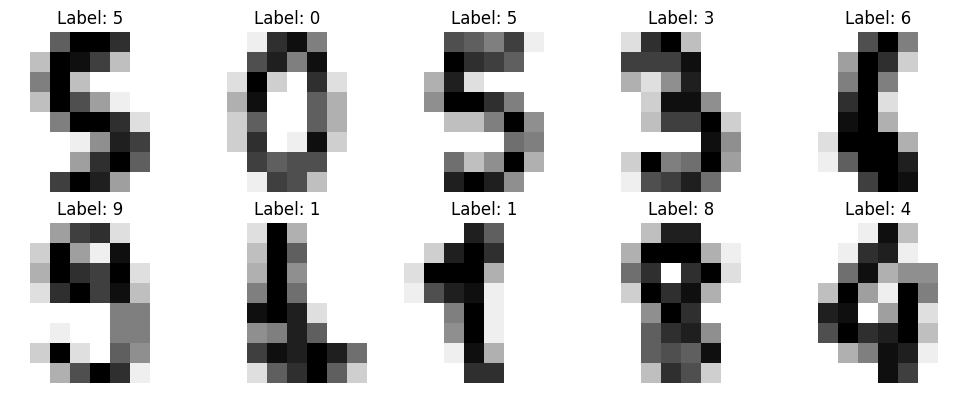

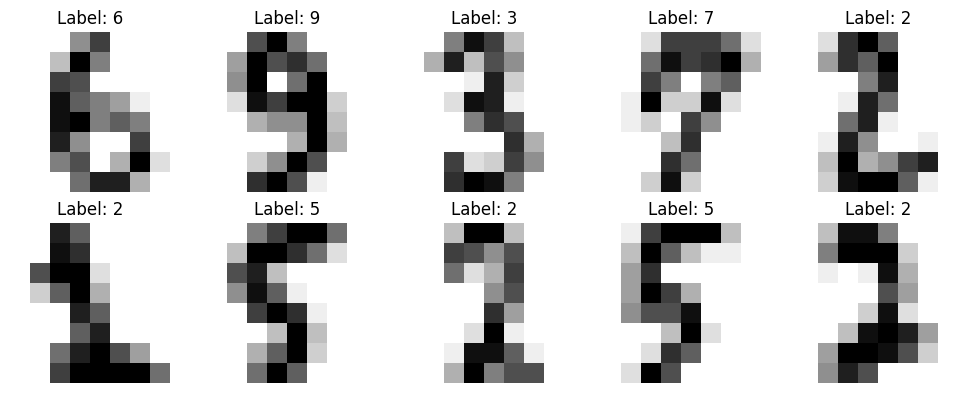

In [2]:
# 必要なライブラリのインポート
import matplotlib.pyplot as plt

# MNISTデータセットのサンプル画像を表示する関数
def plot_digits(images, labels, nrows=2, ncols=5):
    plt.figure(figsize=(10, 4))
    for i in range(nrows * ncols):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i].reshape(8, 8), cmap=plt.cm.gray_r)
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# ラベル付きデータのサンプル画像を表示
plot_digits(X_labeled, y_labeled)

# ここに前述のモデル学習のコードを挿入

# テストデータの予測結果を表示
y_pred = self_training_model.predict(X_test)
plot_digits(X_test, y_pred)


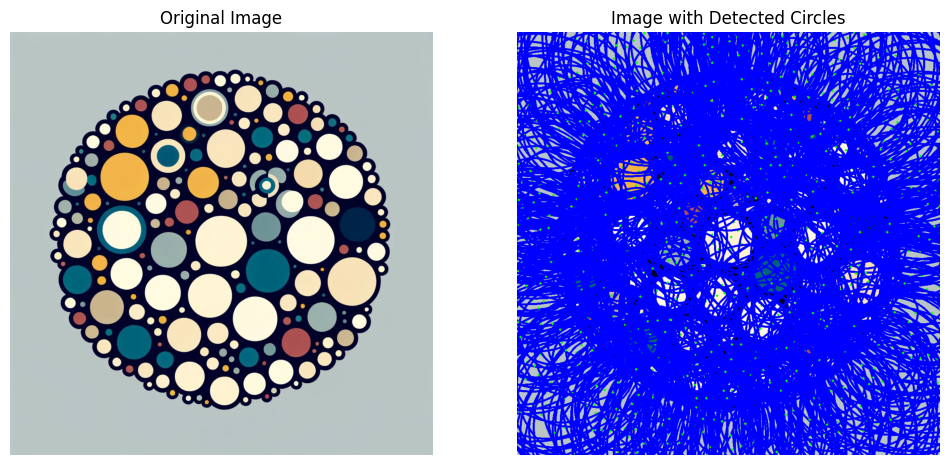

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み（先に生成した画像ファイルのパスに置き換えてください）
image_path = '/Users/kimuratoshiyuki/Dropbox/Python/stats/DALL·E 2023-12-27 05.50.31 - A simple image featuring multiple circles of various sizes and colors on a plain background. The circles should be clearly visible and distinct, ideal.png'
original_image = cv2.imread(image_path)
image = original_image.copy()

# グレースケールに変換
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ガウシアンブラーを適用
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 0)

# Hough変換を使用して円を検出
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

# 検出された円を描画
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # 円の中心
        center = (i[0], i[1])
        # 円の半径
        radius = i[2]
        # 円の中心を描画
        cv2.circle(image, center, 1, (0, 255, 0), 3)
        # 円の外周を描画
        cv2.circle(image, center, radius, (255, 0, 0), 3)

# 元の画像と処理後の画像を並べて表示
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Image with Detected Circles")
plt.axis("off")

plt.show()


## 修正後

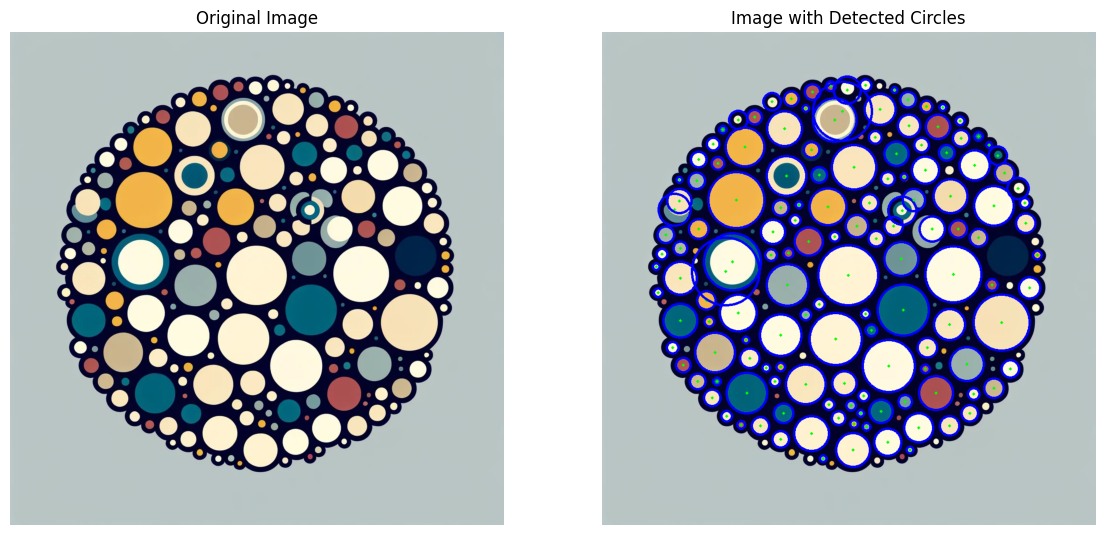

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像の読み込み
image_path = '/Users/kimuratoshiyuki/Dropbox/Python/stats/DALL·E 2023-12-27 05.50.31 - A simple image featuring multiple circles of various sizes and colors on a plain background. The circles should be clearly visible and distinct, ideal.png'
original_image = cv2.imread(image_path)
image = original_image.copy()

# グレースケールに変換
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ガウシアンブラーを適用
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 0)

'''
cv2.HoughCircles関数を使用して円を検出します。

- gray_blurred: ガウシアンブラーを適用した後のグレースケール画像
- cv2.HOUGH_GRADIENT: Hough変換の勾配法を使用することを示す
- 1: dp, 画像解像度に対する逆比率。'1'は入力画像と同じ解像度。
- 20: minDist, 検出される円の中心間の最小距離。
- param1=100: Cannyエッジ検出器の高閾値。
- param2=30: アキュムレータ配列の閾値。大きい値ほど、強い円のみ検出。
- minRadius=1: 検出する円の最小半径。
- maxRadius=100: 検出する円の最大半径。
'''
circles = cv2.HoughCircles(gray_blurred, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30, minRadius=1, maxRadius=100)

# 検出された円を描画
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # 円の中心
        center = (i[0], i[1])
        # 円の半径
        radius = i[2]
        # 円の中心を描画
        cv2.circle(image, center, 1, (0, 255, 0), 3)
        # 円の外周を描画
        cv2.circle(image, center, radius, (255, 0, 0), 3)

# 元の画像と処理後の画像を並べて表示する関数
def show_images(original, detected):
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(detected, cv2.COLOR_BGR2RGB))
    plt.title('Image with Detected Circles')
    plt.axis('off')
    
    plt.show()

# 画像を表示
show_images(original_image, image)


# Hough変換による円検出

Hough変換は画像内の幾何学的な図形を検出するためのテクニックで、特に円や直線の検出に効果的です。

## ステップ1: 画像の前処理

画像をグレースケールに変換し、ガウシアンブラーを適用してノイズを減らします。

```python
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blurred = cv2.GaussianBlur(gray, (9, 9), 0)
```

## ステップ2: Hough変換のパラメーター

cv2.HoughCircles 関数には以下の重要なパラメーターがあります：

- dp: 解像度の比率パラメーター。
- minDist: 検出される円の中心間の最小距離。
- param1: Cannyエッジ検出器の高い閾値。
- param2: 円の中心を検出する際のアキュムレータ閾値。
- minRadiusとmaxRadius: 検出される円の半径の範囲。

## ステップ3: パラメーターの調整

円検出のためのパラメーターを調整して、検出結果を改善します。
```python
# Hough変換を使用して円を検出
circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    1,
    20,
    param1=100,
    param2=30,
    minRadius=1,
    maxRadius=100
)
```

## ステップ4: 結果の検証

検出された円を元の画像に描画して、結果を視覚的に検証します。

```python
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
```